# <span style="color:blue">Title: Protein-Protein Interaction Networks with the </span><span style="color:red">STRING Database</span>

# <span style="color:blue">STRING Database Python Tutorial<span style="color:blue">.</span>
* ## References
    * ## STRING: functional protein association networks. String-db.org. [accessed 2023 Jul 4]. https://string-db.org/.
    * ## API - STRING help. String-db.org. [accessed 2023 Jul 4]. https://string-db.org/help/api/.

# <span style="color:blue">Competency</span>
* ## Become proficient in using Python's stringdb library to generate protein-protein interaction networks from a list of marker genes for a cluster from HuBMAP's scRNA-seq data analysis.

# <span style="color:blue">Objectives</span>
* ## Define the lists of marker genes for the clusters from a HuBMAP scRNA-seq data analysis with scanpy.
* ## Map the list of marker genes for cluster 0 to the STRING DB IDs application programming interface (API).
* ## Make sense of cluster-specific marker genes by generating physical and funtional protein-protein interaction networks with the STRING API.


# <span style="color:blue">Install the required </span><span style="color:red">Python libraries</span><span style="color:blue"> to conduct the </span><span style="color:red">STRING Datanase analysis</span><span style="color:blue">.</span>

In [1]:
##################################################################################
# Install the required Python libraries to conduct the STRING Database analysis. #
##################################################################################

# Install stringdb
!pip install stringdb -q

# Install requests
!pip install requests -q

# Install matplotlib
!pip install matplotlib -q

# Install seaborn
!pip install seaborn -q

# <span style="color:blue">Load required </span><span style="color:red">Python libraries</span><span style="color:blue">.</span>

In [2]:
###################################
# Load required Python libraries. #
###################################

#import os
import os

# stringdb: perform the analysis for known and predicted protein-protein interactions. 
import stringdb

# requests: allow to send HTTP/1.1 requests extremely easily  
import requests

# matplotlib: comprehensive library for creating static, animated, and interactive visualizations.
import matplotlib.pyplot as plt

import matplotlib as mpl

from matplotlib import cm

from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)

# seaborn: data visualization library based on matplotlib. It provides a high-level interface for drawing attractive &
#          informative statistical graphics.
import seaborn as sns

# textwrap: provides functions for wrapping, filling, and formatting plain text.
import textwrap

# json: work with JavaScript Object Notation (JSON) data
import json

# Create a directory for the results.

In [3]:
# Create the directory string_db_results

# If the directory string_db_results doesn't exist, it will be created.
if(os.path.exists('string_db_results') == False):
    os.mkdir('string_db_results')
# Othewise it will display a message that it exists.
else:
    print('The directory string_db_results exist.')

#  Change the working directory in the Jupyter Notebook
os.chdir('string_db_results')

The directory string_db_results exist.


# Define the lists for the marker genes from HuBMAP's scRNA-seq data analysis obtained with Python's library scanpy.

In [4]:
marker_genes_c0_vs_rest = ['ENSG00000145425.10', 'ENSG00000112306.8', 'ENSG00000156508.18', 'ENSG00000147403.16',
                           'ENSG00000140988.16', 'ENSG00000100316.16', 'ENSG00000105640.13', 'ENSG00000144713.13',
                           'ENSG00000167526.13', 'ENSG00000198034.11',  'ENSG00000149273.15', 'ENSG00000105372.8',
                           'ENSG00000142937.12', 'ENSG00000134419.15', 'ENSG00000137154.13',  'ENSG00000110700.7',
                           'ENSG00000143947.13', 'ENSG00000138326.20', 'ENSG00000108298.11', 'ENSG00000142676.14', 
                           'ENSG00000109475.16', 'ENSG00000231500.7', 'ENSG00000096150.9', 'ENSG00000162244.12',
                           'ENSG00000124614.16']

marker_genes_c1_vs_rest = ['ENSG00000124191.18', 'ENSG00000182568.17', 'ENSG00000160654.10', 'ENSG00000127152.18',
                           'ENSG00000167286.9', 'ENSG00000276849.6', 'ENSG00000211772.11', 'ENSG00000185811.19',
                           'ENSG00000138795.10', 'ENSG00000213658.11', 'ENSG00000277734.8', 'ENSG00000124766.7',
                           'ENSG00000081237.20', 'ENSG00000064886.14', 'ENSG00000099204.20', 'ENSG00000285437.1',
                           'ENSG00000115977.19', 'ENSG00000197563.11', 'ENSG00000153563.15', 'ENSG00000172116.23',
                           'ENSG00000213442.5', 'ENSG00000078596.11', 'ENSG00000100351.17', 'ENSG00000198625.13',
                           'ENSG00000198851.9']

marker_genes_c2_vs_rest = ['ENSG00000167286.9', 'ENSG00000156508.18', 'ENSG00000160654.10', 'ENSG00000112306.8',
                           'ENSG00000145425.10', 'ENSG00000110700.7', 'ENSG00000149273.15', 'ENSG00000198034.11',
                           'ENSG00000124614.16', 'ENSG00000147403.16', 'ENSG00000172116.23', 'ENSG00000144713.13',
                           'ENSG00000142937.12', 'ENSG00000153563.15', 'ENSG00000277734.8', 'ENSG00000184009.12',
                           'ENSG00000100316.16', 'ENSG00000142676.14', 'ENSG00000105372.8', 'ENSG00000137154.13',
                           'ENSG00000109475.16', 'ENSG00000143947.13', 'ENSG00000138326.20', 'ENSG00000034510.6',
                           'ENSG00000211772.11']

marker_genes_c3_vs_rest = ['ENSG00000019582.15', 'ENSG00000156738.17', 'ENSG00000105369.9', 'ENSG00000206308.11',
                           'ENSG00000226260.9', 'ENSG00000204287.14', 'ENSG00000231939.5', 'ENSG00000104894.12',
                           'ENSG00000277263.1', 'ENSG00000211899.10', 'ENSG00000228080.10', 'ENSG00000228987.9',
                           'ENSG00000211592.8', 'ENSG00000224103.7', 'ENSG00000230463.2', 'ENSG00000196101.9',
                           'ENSG00000007312.12', 'ENSG00000231389.7', 'ENSG00000159958.6', 'ENSG00000230763.11',
                           'ENSG00000067082.15', 'ENSG00000215048.13', 'ENSG00000229295.11', 'ENSG00000168384.11',
                           'ENSG00000236177.9']

marker_genes_c4_vs_rest = ['ENSG00000130844.18', 'ENSG00000152518.8', 'ENSG00000102760.13', 'ENSG00000095794.19',
                           'ENSG00000078596.11', 'ENSG00000118503.15', 'ENSG00000130522.6', 'ENSG00000133872.14',
                           'ENSG00000138767.13', 'ENSG00000213639.10', 'ENSG00000188042.8', 'ENSG00000124766.7',
                           'ENSG00000124466.9', 'ENSG00000119801.13', 'ENSG00000104660.19', 'ENSG00000157514.16',
                           'ENSG00000146278.11', 'ENSG00000113448.19', 'ENSG00000168685.15', 'ENSG00000127824.14',
                           'ENSG00000132510.10', 'ENSG00000127152.18', 'ENSG00000182372.9', 'ENSG00000171223.6',
                           'ENSG00000116044.16']

marker_genes_c5_vs_rest = ['ENSG00000163599.17', 'ENSG00000185885.16', 'ENSG00000067082.15', 'ENSG00000003147.19',
                           'ENSG00000198763.3', 'ENSG00000171223.6', 'ENSG00000127528.5', 'ENSG00000168610.14',
                           'ENSG00000196154.12', 'ENSG00000181847.12', 'ENSG00000136111.14', 'ENSG00000187601.5',
                           'ENSG00000157514.16', 'ENSG00000120875.9', 'ENSG00000172005.11', 'ENSG00000179144.5',
                           'ENSG00000133574.10', 'ENSG00000100100.13', 'ENSG00000163564.15', 'ENSG00000215788.10',
                           'ENSG00000265972.6', 'ENSG00000069667.16', 'ENSG00000144642.22', 'ENSG00000213203.3',
                           'ENSG00000008517.16']

marker_genes_c6_vs_rest = ['ENSG00000132002.8', 'ENSG00000177606.7', 'ENSG00000171223.6', 'ENSG00000170345.10',
                           'ENSG00000235941.5', 'ENSG00000237724.5', 'ENSG00000215328.6', 'ENSG00000234475.5',
                           'ENSG00000204389.10', 'ENSG00000159388.6', 'ENSG00000160888.7', 'ENSG00000168209.5',
                           'ENSG00000123358.20', 'ENSG00000120129.6', 'ENSG00000080824.18', 'ENSG00000078596.11',
                           'ENSG00000277734.8', 'ENSG00000173110.8', 'ENSG00000231555.4', 'ENSG00000204388.7',
                           'ENSG00000117318.9', 'ENSG00000198821.10', 'ENSG00000232804.5', 'ENSG00000272196.2',
                           'ENSG00000203812.2']

marker_genes_c7_vs_rest = ['ENSG00000111640.15', 'ENSG00000227191.8', 'ENSG00000070081.17', 'ENSG00000080824.18',
                           'ENSG00000120690.16', 'ENSG00000117318.9', 'ENSG00000198712.1', 'ENSG00000030419.16',
                           'ENSG00000115232.14', 'ENSG00000187514.16', 'ENSG00000081059.20', 'ENSG00000078304.19',
                           'ENSG00000065978.19', 'ENSG00000027075.15', 'ENSG00000196549.10', 'ENSG00000198804.2',
                           'ENSG00000173762.8', 'ENSG00000198886.2', 'ENSG00000198899.2', 'ENSG00000087460.25',
                           'ENSG00000122034.15', 'ENSG00000136490.9', 'ENSG00000184009.12', 'ENSG00000211829.9',
                           'ENSG00000095932.7']

marker_genes_c8_vs_rest = ['ENSG00000198804.2', 'ENSG00000198938.2', 'ENSG00000198712.1', 'ENSG00000198899.2',
                           'ENSG00000198886.2', 'ENSG00000198727.2', 'ENSG00000269028.3', 'ENSG00000198763.3',
                           'ENSG00000198888.2', 'ENSG00000198786.2', 'ENSG00000198840.2', 'ENSG00000248527.1',
                           'ENSG00000030419.16', 'ENSG00000155657.26', 'ENSG00000198695.2', 'ENSG00000233822.4',
                           'ENSG00000255513.1', 'ENSG00000172995.16', 'ENSG00000214756.8', 'ENSG00000277072.5',
                           'ENSG00000225972.1', 'ENSG00000197238.4', 'ENSG00000182010.11', 'ENSG00000174501.14',
                           'ENSG00000277224.2']

marker_genes_c9_vs_rest = ['ENSG00000167286.9', 'ENSG00000187514.16', 'ENSG00000070081.17', 'ENSG00000277734.8',
                           'ENSG00000142669.15', 'ENSG00000127124.16', 'ENSG00000135127.11', 'ENSG00000111640.15',
                           'ENSG00000184182.18', 'ENSG00000135486.17', 'ENSG00000179218.13', 'ENSG00000153563.15',
                           'ENSG00000135916.16', 'ENSG00000133872.14', 'ENSG00000276701.2', 'ENSG00000027869.11',
                           'ENSG00000198520.12', 'ENSG00000181163.13', 'ENSG00000116473.14', 'ENSG00000211772.11',
                           'ENSG00000067225.18', 'ENSG00000128228.5', 'ENSG00000131469.14', 'ENSG00000276849.6',
                           'ENSG00000171159.5']

marker_genes_c10_vs_rest = ['ENSG00000269028.3', 'ENSG00000198888.2', 'ENSG00000163220.11', 'ENSG00000090382.6',
                            'ENSG00000197956.10', 'ENSG00000196154.12', 'ENSG00000198804.2', 'ENSG00000087086.15',
                            'ENSG00000143546.10', 'ENSG00000198938.2', 'ENSG00000198712.1', 'ENSG00000130066.16',
                            'ENSG00000101439.9', 'ENSG00000026025.16', 'ENSG00000100097.12', 'ENSG00000198763.3',
                            'ENSG00000198886.2', 'ENSG00000167996.16', 'ENSG00000198786.2', 'ENSG00000100906.10',
                            'ENSG00000163191.6', 'ENSG00000100300.18', 'ENSG00000169429.11', 'ENSG00000011600.11',
                            'ENSG00000198899.2']

marker_genes_c11_vs_rest = ['ENSG00000271503.6', 'ENSG00000274233.4', 'ENSG00000100906.10', 'ENSG00000080824.18',
                            'ENSG00000237724.5', 'ENSG00000235941.5', 'ENSG00000215328.6', 'ENSG00000122862.5',
                            'ENSG00000234475.5', 'ENSG00000105374.10', 'ENSG00000158050.5', 'ENSG00000099860.9',
                            'ENSG00000111796.4', 'ENSG00000132002.8', 'ENSG00000128016.7', 'ENSG00000185201.16',
                            'ENSG00000011600.11', 'ENSG00000120129.6', 'ENSG00000160888.7', 'ENSG00000115523.16',
                            'ENSG00000204389.10', 'ENSG00000077984.6', 'ENSG00000134539.17', 'ENSG00000096384.20',
                            'ENSG00000125740.14']

marker_genes_c12_vs_rest = ['ENSG00000211751.9', 'ENSG00000281981.2', 'ENSG00000277734.8', 'ENSG00000127152.18',
                            'ENSG00000282105.1', 'ENSG00000167286.9', 'ENSG00000064886.14', 'ENSG00000138795.10',
                            'ENSG00000143851.15', 'ENSG00000232573.1', 'ENSG00000180573.9', 'ENSG00000164088.18',
                            'ENSG00000198821.10', 'ENSG00000117318.9', 'ENSG00000213442.5', 'ENSG00000234287.1',
                            'ENSG00000186517.14', 'ENSG00000196505.11', 'ENSG00000185896.11', 'ENSG00000220793.5',
                            'ENSG00000198625.13', 'ENSG00000123080.12', 'ENSG00000078596.11', 'ENSG00000166801.15',
                            'ENSG00000213658.11']

marker_genes_c13_vs_rest = ['ENSG00000269028.3', 'ENSG00000080824.18', 'ENSG00000198804.2', 'ENSG00000167996.16',
                            'ENSG00000067082.15', 'ENSG00000184009.12', 'ENSG00000089157.16', 'ENSG00000198886.2',
                            'ENSG00000132475.10', 'ENSG00000233276.5', 'ENSG00000204628.12', 'ENSG00000087460.25',
                            'ENSG00000147403.16', 'ENSG00000280858.3', 'ENSG00000096384.20', 'ENSG00000140988.16',
                            'ENSG00000198888.2', 'ENSG00000161970.15', 'ENSG00000186468.13', 'ENSG00000229117.9',
                            'ENSG00000198034.11', 'ENSG00000164587.13', 'ENSG00000174748.21', 'ENSG00000173812.11',
                            'ENSG00000198938.2']

marker_genes_c14_vs_rest = ['ENSG00000019582.15', 'ENSG00000228080.10', 'ENSG00000198804.2', 'ENSG00000101439.9',
                            'ENSG00000204287.14', 'ENSG00000231939.5', 'ENSG00000224103.7', 'ENSG00000269028.3',
                            'ENSG00000206308.11', 'ENSG00000226260.9', 'ENSG00000026025.16', 'ENSG00000230463.2',
                            'ENSG00000034510.6', 'ENSG00000080824.18', 'ENSG00000198938.2', 'ENSG00000150991.15',
                            'ENSG00000205542.11', 'ENSG00000090382.6', 'ENSG00000198712.1', 'ENSG00000137818.12',
                            'ENSG00000198888.2', 'ENSG00000105193.9', 'ENSG00000167996.16', 'ENSG00000198727.2',
                            'ENSG00000186468.13']

marker_genes_c15_vs_rest = ['ENSG00000150991.15', 'ENSG00000008517.16', 'ENSG00000227715.11', 'ENSG00000235657.9',
                            'ENSG00000196154.12', 'ENSG00000228964.10', 'ENSG00000224608.10', 'ENSG00000067082.15',
                            'ENSG00000166710.20', 'ENSG00000141682.11', 'ENSG00000130066.16', 'ENSG00000080824.18',
                            'ENSG00000235941.5', 'ENSG00000237724.5', 'ENSG00000122862.5', 'ENSG00000132002.8',
                            'ENSG00000215328.6', 'ENSG00000156127.7', 'ENSG00000090104.12', 'ENSG00000225691.7',
                            'ENSG00000234475.5', 'ENSG00000206452.10', 'ENSG00000206435.10', 'ENSG00000172183.15',
                            'ENSG00000204389.10']

marker_genes_c16_vs_rest = ['ENSG00000011465.17', 'ENSG00000189058.9', 'ENSG00000170345.10', 'ENSG00000111341.10',
                            'ENSG00000177606.7', 'ENSG00000120738.8', 'ENSG00000125740.14', 'ENSG00000237724.5',
                            'ENSG00000235941.5', 'ENSG00000148180.19', 'ENSG00000087086.15', 'ENSG00000130203.10',
                            'ENSG00000171223.6', 'ENSG00000128016.7', 'ENSG00000152583.12', 'ENSG00000197766.8',
                            'ENSG00000160888.7', 'ENSG00000142089.16', 'ENSG00000274619.2', 'ENSG00000159403.18',
                            'ENSG00000108821.13', 'ENSG00000149131.15', 'ENSG00000163453.11', 'ENSG00000101439.9',
                            'ENSG00000187479.8']

marker_genes_c17_vs_rest = ['ENSG00000105369.9', 'ENSG00000170476.16', 'ENSG00000051108.15', 'ENSG00000177606.7',
                            'ENSG00000080824.18', 'ENSG00000180879.14', 'ENSG00000150991.15', 'ENSG00000084207.17',
                            'ENSG00000225691.7', 'ENSG00000224608.10', 'ENSG00000166598.15', 'ENSG00000198786.2',
                            'ENSG00000019582.15', 'ENSG00000044574.8', 'ENSG00000269028.3', 'ENSG00000090104.12',
                            'ENSG00000100219.16', 'ENSG00000228964.10', 'ENSG00000198712.1', 'ENSG00000114902.14',
                            'ENSG00000227715.11', 'ENSG00000235657.9', 'ENSG00000113387.12', 'ENSG00000007312.12',
                            'ENSG00000198886.2']

# <span style="color:blue">Remove the </span><span style="color:red">version number from the Ensemble IDs</span><span style="color:blue">.</span>

## Python function remove_version
* ## This function removes the version number from the ensembl identifier.

In [5]:
# This function split the ensembl ID.version by the dot and keeps only the ID number.
def remove_version(marker_genes):
    # Define an empty list named ensembl_ids_wo_version
    ensembl_ids_wo_version = []
    
    # Initialize count_gene to one.
    count_gene = 1
    
    # Display the column titles.
    # Traverse the list of Ensembl IDs with the version number.
    for gene in marker_genes:
        # Split the Ensembl ID using the dot as the symbol.
        ensembl_gene_id_split = gene.split('.')
        # Add the Ensembl ID without the version number.
        ensembl_ids_wo_version = ensembl_ids_wo_version + [ensembl_gene_id_split[0]]
        # Increase the counter variable count_gene by one unit.
        count_gene += 1
    return ensembl_ids_wo_version

## Call the Python function remove_version and replace the original lists with only the Ensembl ID.

In [6]:
# Replace the original lists with the Ensembl ID without the version number.
marker_genes_c0_vs_rest = remove_version(marker_genes_c0_vs_rest)

marker_genes_c1_vs_rest = remove_version(marker_genes_c1_vs_rest)

marker_genes_c2_vs_rest = remove_version(marker_genes_c2_vs_rest)

marker_genes_c3_vs_rest = remove_version(marker_genes_c3_vs_rest)

marker_genes_c4_vs_rest = remove_version(marker_genes_c4_vs_rest)

marker_genes_c5_vs_rest = remove_version(marker_genes_c5_vs_rest)

marker_genes_c6_vs_rest = remove_version(marker_genes_c6_vs_rest)

marker_genes_c7_vs_rest = remove_version(marker_genes_c7_vs_rest)

marker_genes_c8_vs_rest = remove_version(marker_genes_c8_vs_rest)

marker_genes_c9_vs_rest = remove_version(marker_genes_c9_vs_rest)

marker_genes_c10_vs_rest = remove_version(marker_genes_c10_vs_rest)

marker_genes_c11_vs_rest = remove_version(marker_genes_c11_vs_rest)

marker_genes_c12_vs_rest = remove_version(marker_genes_c12_vs_rest)

marker_genes_c13_vs_rest = remove_version(marker_genes_c13_vs_rest)

marker_genes_c14_vs_rest = remove_version(marker_genes_c14_vs_rest)

marker_genes_c15_vs_rest = remove_version(marker_genes_c15_vs_rest)

marker_genes_c16_vs_rest = remove_version(marker_genes_c16_vs_rest)

marker_genes_c17_vs_rest = remove_version(marker_genes_c17_vs_rest)

# <span style="color:blue">Map the genes to the </span><span style="color:red">STRING database IDs</span><span style="color:blue">.</span>
* ## The STRING database API can be called with common gene names, various synonyms or even UniProt identifiers and accession numbers.
* ## The first step after accessing the STRING database API is to map your identifiers to the ones STRING uses.

|<span style="color:blue">Field</span>|<span style="color:blue">Description</span>|
|:---:|:---------:|
|queryItem|(OPTIONAL) your input protein|
|queryIndex|position of the protein in your input (starting from position 0)|
|stringId|STRING identifier|
|ncbiTaxonId|NCBI taxon identifier|
|taxonName|species name|
|preferredName|common protein name|
|annotation|protein annotation|

In [7]:
############################################
# Get the STRING IDs from the IDs provided #
############################################

#######################
# Mapping identifiers #
#######################
#
#   STRING API accepts common gene names, various synonyms or even UniProt IDs
# & ACs. But it is always good to map the genes to the STRING IDs first before
# proceeding further beacuse STRING may not always understand them causing
# errors or inconsistencies.
#
print('\nMapping IDs for cluster 0\n')
string_ids = stringdb.get_string_ids(marker_genes_c0_vs_rest, species = 9606, limit = 1, echo_query = 1)

# Display the mapping results
print(string_ids)

# Get the number of rows & columns in the string_ids pandas data frame.
rows, cols = string_ids.shape
print('string_ids pandas data frame')
print('\tNo. rows = %d & No. columns = %d' % (rows, cols))

# Column names
#   queryItem
#   queryIndex
#   stringId
#   ncbiTaxonId
#   taxonName
#   preferredName
#   annotation

print('\nDetailed annotation for each ID in cluster 0')

# Traverse the string_ids pandas data frame to display the annotations.
for row_num in range(0, rows, 1):
    print('\nQuery Item: %s & Preferred Name: %s' % (string_ids.loc[row_num,'queryItem'],
                                                     string_ids.loc[row_num,'preferredName']))
    print('\t', string_ids.loc[row_num,'annotation'])

# Export the string_ids pandas data frame into a file.
string_ids.to_csv('string_ids.csv')


Mapping IDs for cluster 0

          queryItem  queryIndex              stringId  ncbiTaxonId  \
0   ENSG00000145425           0  9606.ENSP00000346050         9606   
1   ENSG00000112306           1  9606.ENSP00000230050         9606   
2   ENSG00000156508           2  9606.ENSP00000339063         9606   
3   ENSG00000147403           3  9606.ENSP00000413436         9606   
4   ENSG00000140988           4  9606.ENSP00000341885         9606   
5   ENSG00000100316           5  9606.ENSP00000346001         9606   
6   ENSG00000105640           6  9606.ENSP00000222247         9606   
7   ENSG00000144713           7  9606.ENSP00000416429         9606   
8   ENSG00000167526           8  9606.ENSP00000307889         9606   
9   ENSG00000198034           9  9606.ENSP00000362744         9606   
10  ENSG00000149273          10  9606.ENSP00000278572         9606   
11  ENSG00000105372          11  9606.ENSP00000470972         9606   
12  ENSG00000142937          12  9606.ENSP00000379888         

# <span style="color:blue">Display the genes that weren't mapped to the </span><span style="color:red">STRING database IDs</span><span style="color:blue"> if any.</span>

In [8]:
# Extract the list of the genes that were mapped in the STRING Database.
genes = list(string_ids['queryItem'])

# Extract the genes that weren't mapped to the STRING Database.
genes_not_mapped = list(set(marker_genes_c0_vs_rest).difference(genes))

# Check that there are genes that weren't mapped.
if(len(genes_not_mapped) > 0):
    # Display the amount of genes that weren't mapped.
    print('\nGenes not mapped')
    # Initialize the variable gene_counter to one.
    gene_counter = 1
    # Display the genes that weren't mapped to the STRING Database.
    for gene in genes_not_mapped:
        # Display the name of the gene.
        print('\t%d) %s' % (gene_counter, gene))
        # Increase gene_counter by one unit.
        gene_counter += 1
else:
    print('All genes were mapped.')


Genes not mapped
	1) ENSG00000096150


# <span style="color:blue">Display the genes that were mapped to the </span><span style="color:red">STRING database IDs</span>

In [9]:
# Extract the list of the genes that were mapped in the STRING Database.
genes = string_ids[['queryItem', 'preferredName']]

# Increase the index of the pandas dataframe by one unit.
genes.index = range(1, len(genes)+1)

# Display the information.
print(genes.to_string())

          queryItem preferredName
1   ENSG00000145425         RPS3A
2   ENSG00000112306         RPS12
3   ENSG00000156508        EEF1A1
4   ENSG00000147403         RPL10
5   ENSG00000140988          RPS2
6   ENSG00000100316          RPL3
7   ENSG00000105640        RPL18A
8   ENSG00000144713         RPL32
9   ENSG00000167526         RPL13
10  ENSG00000198034         RPS4X
11  ENSG00000149273          RPS3
12  ENSG00000105372         RPS19
13  ENSG00000142937          RPS8
14  ENSG00000134419        RPS15A
15  ENSG00000137154          RPS6
16  ENSG00000110700         RPS13
17  ENSG00000143947        RPS27A
18  ENSG00000138326         RPS24
19  ENSG00000108298         RPL19
20  ENSG00000142676         RPL11
21  ENSG00000109475         RPL34
22  ENSG00000231500         RPS18
23  ENSG00000162244         RPL29
24  ENSG00000124614         RPS10


# <span style="color:blue">Display the genes that were mapped to the </span><span style="color:red">STRING database IDs</span><span style="color:blue"> and have a different preferred name.</span>

In [10]:
# Extract the genes that weren't mapped to the STRING Database.
input_genes = list(set(string_ids['queryItem']).difference(string_ids['preferredName']))
genes_with_different_preffered_name = list(set(string_ids['preferredName']).difference(string_ids['queryItem']))

# Check that there are genes with different preferred names.
if(len(genes_with_different_preffered_name) > 0):
    # Display the amount of genes that weren't mapped.
    print('\nGenes with different preferred names.')
    # Initialize the variable gene_counter to one.
    gene_counter = 1
    # Display the genes that weren't mapped to the STRING Database.
    for gene in genes_with_different_preffered_name:
        # Display the name of the gene.
        print('\t%d) %s = %s' % (gene_counter, input_genes[gene_counter - 1], gene))
        # Increase gene_counter by one unit.
        gene_counter += 1
else:
    print('All genes have the same names with the dataset provided.')


Genes with different preferred names.
	1) ENSG00000145425 = RPL18A
	2) ENSG00000162244 = RPS19
	3) ENSG00000124614 = RPS27A
	4) ENSG00000149273 = RPL29
	5) ENSG00000167526 = RPS4X
	6) ENSG00000100316 = RPS18
	7) ENSG00000142937 = RPL32
	8) ENSG00000137154 = RPS12
	9) ENSG00000112306 = RPS2
	10) ENSG00000105372 = RPL13
	11) ENSG00000156508 = RPL34
	12) ENSG00000198034 = RPS3
	13) ENSG00000231500 = RPS10
	14) ENSG00000138326 = RPS15A
	15) ENSG00000110700 = RPS6
	16) ENSG00000109475 = RPS24
	17) ENSG00000147403 = RPL3
	18) ENSG00000140988 = RPS3A
	19) ENSG00000105640 = RPL10
	20) ENSG00000108298 = EEF1A1
	21) ENSG00000144713 = RPL11
	22) ENSG00000134419 = RPS8
	23) ENSG00000143947 = RPL19
	24) ENSG00000142676 = RPS13


# <span style="color:blue">Generate the </span><span style="color:red">STRING database interaction network image</span><span style="color:blue">.</span>
* ## Species
    * ## Human, NCBI identifier = 9606
* ## Network flavor
    * ## Evidence
* ## Network type
    * ## Functional
* ## Required score
    * ## 700 (High Confidence)

In [11]:
#########################
# Get the network image #
#########################
#
string_api_url = "https://version-12-0.string-db.org/api"
output_format = "highres_image"
method = "network"

## Construct URL
request_url = "/".join([string_api_url, output_format, method])

############################################
# Parameters for the network with evidence #
############################################
#   identifiers
#       required parameter for multiple items, e.g. DRD1_HUMAN%0dDRD2_HUMAN
#
#   species
#       NCBI taxon identifiers (e.g. Human is 9606, see: STRING organisms).
#
#   add_color_nodes
#       adds color nodes based on scores to the input proteins
#
#   add_white_nodes
#       adds white nodes based on scores to the input proteins (added after
#       color nodes)
#
#   required_score
#       threshold of significance to include an interaction, a number between 0
#       and 1000 (default depends on the network)
#
#   network_flavor
#       the style of edges in the network: evidence, confidence (default),
#       actions
#
#   network_type
#       network type: functional (default), physical
#
#   hide_node_labels
#       hides all protein names from the picture (0 or 1) (defailt:0)
#
#   hide_disconnected_nodes
#       hides all proteins that are not connected to any other protein in your
#       network (0 or 1) (default:0)
#
#   show_query_node_labels
#       when provided use submitted names as protein labels in the network image
#       (0 or 1) (default:0)
#
#   block_structure_pics_in_bubbles
#       disables structure pictures inside the bubble (0 or 1) (default:0)
#
params = {"identifiers" : "\r".join(string_ids.preferredName), # your protein
          "species" : 9606, # species NCBI identifier
          "limit" : 1, # only one (best) identifier per input protein
          "network_flavor": "evidence", # the style of edges in the network: evidence, confidence (default), actions
          "network_type": "functional", # network type: functional (default), physical
          "required_score": 700, # threshold of significance to include an interaction, 0-1000
         }

# Call STRING
response = requests.post(request_url, data=params)

# Save the network to file
file_name = "cluster_0_network_evidence.png"
print("\nSaving interaction network to \"%s\"\n" % file_name)

with open(file_name, 'wb') as fh:
    fh.write(response.content)


Saving interaction network to "cluster_0_network_evidence.png"



# <span style="color:blue">Generate the </span><span style="color:red">STRING database interaction network image per gene</span><span style="color:blue"> in the cluster.</span>
* ## Species
    * ## Human, NCBI identifier = 9606
* ## Network type
    * ## Functional
* ## Network flavor
    * ## Evidence
* ## Required score
    * ## 700 (High Confidence)

In [12]:
###########################################
# Getting the network image for each gene #
###########################################
#
# For each protein in a list save the PNG image of
# STRING network of its 15 most confident interaction partners with evidence.
#
# Requires the library requests
#
string_api_url = "https://version-12-0.string-db.org/api"

output_format = "highres_image"

method = "network"

request_url = "/".join([string_api_url, output_format, method])

for gene in string_ids.preferredName:
    # Set parameters
    params = {
        "identifiers" : gene, # the gene
        "species" : 9606, # species NCBI identifier 9606 is Homo sapiens
        "add_white_nodes": 15, # add 15 white nodes to my gene
        "network_type": "functional", # 
        "network_flavor": "evidence", # show confidence links
        "required_score": 700, # threshold of significance to include an interaction, 0-1000
    }

    # Call STRING

    response = requests.post(request_url, data=params)

    # Save the network to file

    file_name = "%s_interaction_network.png" % gene
    print("Saving interaction network to %s" % file_name)

    with open(file_name, 'wb') as fh:
        fh.write(response.content)

Saving interaction network to RPS3A_interaction_network.png
Saving interaction network to RPS12_interaction_network.png
Saving interaction network to EEF1A1_interaction_network.png
Saving interaction network to RPL10_interaction_network.png
Saving interaction network to RPS2_interaction_network.png
Saving interaction network to RPL3_interaction_network.png
Saving interaction network to RPL18A_interaction_network.png
Saving interaction network to RPL32_interaction_network.png
Saving interaction network to RPL13_interaction_network.png
Saving interaction network to RPS4X_interaction_network.png
Saving interaction network to RPS3_interaction_network.png
Saving interaction network to RPS19_interaction_network.png
Saving interaction network to RPS8_interaction_network.png
Saving interaction network to RPS15A_interaction_network.png
Saving interaction network to RPS6_interaction_network.png
Saving interaction network to RPS13_interaction_network.png
Saving interaction network to RPS27A_inter

# <span style="color:blue">Get the </span><span style="color:red">STRING database Network Interaction Table</span><span style="color:blue">.</span>
* ## Species
    * ## Human, NCBI identifier = 9606
* ## Required score
    * ## 700 (High Confidence)


|<span style="color:blue">Field</span>|<span style="color:blue">Description</span>|
|-----|-----------|
|stringId_A|STRING identifier (protein A)|
|stringId_B|STRING identifier (protein B)|
|preferredName_A|common protein name (protein A)|
|preferredName_B|common protein name (protein B)|
|ncbiTaxonId|NCBI taxon identifier|
|score|combined score|
|nscore|gene neighborhood score|
|fscore|gene fusion score|
|pscore|phylogenetic profile score|
|ascore|coexpression score|
|escore|experimental score|
|dscore|database score|
|tscore|textmining score|

In [13]:
#######################################
# Get the network table for Cluster 0 #
#######################################
#
# Show the network table.
stringdb.api.get_network(string_ids.preferredName,
                         species=9606, # species NCBI identifier 9606 is Homo sapiens
                         required_score=700, # threshold of significance to include an interaction, 0-1000
                         caller_identity='https://github.com/gpp-rnd/stringdb')

,stringId_A,stringId_B,preferredName_A,preferredName_B,ncbiTaxonId,score,nscore,fscore,pscore,ascore,escore,dscore,tscore
0,9606.ENSP00000222247,9606.ENSP00000339063,RPL18A,EEF1A1,9606,0.996,0.0,0.0,0,0.853,0.915,0.5,0.545
1,9606.ENSP00000222247,9606.ENSP00000318646,RPL18A,RPS15A,9606,0.999,0.0,0.0,0,0.928,0.972,0.0,0.664
2,9606.ENSP00000222247,9606.ENSP00000294189,RPL18A,RPL29,9606,0.999,0.0,0.0,0,0.980,0.991,0.0,0.348
3,9606.ENSP00000222247,9606.ENSP00000416429,RPL18A,RPL32,9606,0.999,0.0,0.0,0,0.992,0.996,0.9,0.483
4,9606.ENSP00000222247,9606.ENSP00000435777,RPL18A,RPS13,9606,0.999,0.0,0.0,0,0.991,0.993,0.0,0.459
...,...,...,...,...,...,...,...,...,...,...,...,...,...
271,9606.ENSP00000435777,9606.ENSP00000496250,RPS13,RPL11,9606,0.999,0.0,0.0,0,0.999,0.995,0.0,0.647
272,9606.ENSP00000435777,9606.ENSP00000481646,RPS13,RPS10,9606,0.999,0.0,0.0,0,0.961,0.986,0.9,0.788
273,9606.ENSP00000470972,9606.ENSP00000481646,RPS19,RPS10,9606,0.999,0.0,0.0,0,0.960,0.988,0.9,0.937
274,9606.ENSP00000470972,9606.ENSP00000496250,RPS19,RPL11,9606,0.999,0.0,0.0,0,0.991,0.994,0.0,0.928


# <span style="color:blue">Export the STRING Database Interaction Table into a file.</span>

In [14]:
# Store the network table in the variable network_df to export it into a file.
network_df = stringdb.api.get_network(string_ids.preferredName,
                                      species=9606, # species NCBI identifier 9606 is Homo sapiens
                                      required_score=700, # threshold of significance to include an interaction, 0-1000
                                      caller_identity='https://github.com/gpp-rnd/stringdb')


# Sort by score
network_df_sorted = network_df.sort_values(['escore'], ascending = [False])

# Export the network_df_sorted pandas data frame into a file.
network_df_sorted.to_csv('network_df_sorted.csv')

# <span style="color:blue">Get the </span><span style="color:red">STRING database network interactions</span><span style="color:blue"> for proteins with a high confidence experimental score.</span>
* ## Experimental score (escore) $\ge$ 0.700 (High confidence)

|<span style="color:blue">Field</span>|<span style="color:blue">Description</span>|
|-----|-----------|
|preferredName_A|common protein name (protein A)|
|preferredName_B|common protein name (protein B)|
|escore|experimental score|

In [15]:
# Retrieve the STRING interaction network
#
string_api_url = "https://version-12-0.string-db.org/api"
output_format = "tsv"
method = "network"

# Construct URL

request_url = "/".join([string_api_url, output_format, method])

# Set parameters

params = {

    "identifiers" : "%0d".join(string_ids.preferredName), # your protein
    "species" : 9606, # species NCBI identifier 9606 is Homo sapiens 
    "network_flavor": "evidence", # show confidence links
    "required_score": 700, # threshold of significance to include an interaction, 0-1000
}


# Call STRING

response = requests.post(request_url, data=params)

counter = 1

for line in response.text.strip().split("\n"):
    # Sepearare the line by tabs.
    l = line.strip().split("\t")
    
    # If is the column heading for the results.
    if(counter == 1):
        print(l[2].center(20), '\t', l[3].center(20), '\t', l[10].center(38))
    
    # Obtain the values for the third (l[2]) and fourth column (l[3]).
    p1, p2 = l[2], l[3]

    # If is the data for the results.
    if(counter > 1):
        # Convert the value of the eleventh column (l[10]) from string to float.
        experimental_score = float(l[10])
        # Filter the interaction according to experimental score >= 0.7.
        if (experimental_score >= 0.7):
            # Display the only the information for those with a experimental score >= 0.7.
            print("%20s\t%20s\texperimentally confirmed (prob. %5.3f)\n" % (p1.center(20), p2.center(20), experimental_score))

    # Increase the variable counter by one unit.
    counter += 1

  preferredName_A    	   preferredName_B    	                 escore                
       RPL18A       	       EEF1A1       	experimentally confirmed (prob. 0.915)

       RPL18A       	       RPS15A       	experimentally confirmed (prob. 0.972)

       RPL18A       	       RPL29        	experimentally confirmed (prob. 0.991)

       RPL18A       	       RPL32        	experimentally confirmed (prob. 0.996)

       RPL18A       	       RPS13        	experimentally confirmed (prob. 0.993)

       RPL18A       	       RPS3A        	experimentally confirmed (prob. 0.994)

       RPL18A       	       RPS27A       	experimentally confirmed (prob. 0.992)

       RPL18A       	        RPS3        	experimentally confirmed (prob. 0.993)

       RPL18A       	        RPL3        	experimentally confirmed (prob. 0.995)

       RPL18A       	       RPS4X        	experimentally confirmed (prob. 0.974)

       RPL18A       	        RPS2        	experimentally confirmed (prob. 0.993)

       RPL18A

# <span style="color:blue">Get all the </span><span style="color:red">STRING interaction partners</span><span style="color:blue"> for proteins with a high confidence combined score.</span>
* ## Get the interactions between your set of proteins and all the other STRING proteins exported into a file.
* ## Display the interaction partners with a combined score $\ge$ 0.700 (High confidence)

|<span style="color:blue">Field</span>|<span style="color:blue">Description</span>|
|:---:|:---------:|
|stringId_A|STRING identifier (protein A)|
|stringId_B|STRING identifier (protein B)|
|preferredName_A|common protein name (protein A)|
|preferredName_B|common protein name (protein B)|
|ncbiTaxonId|NCBI taxon identifier|
|score|combined score|
|nscore|gene neighborhood score|
|fscore|gene fusion score|
|pscore|phylogenetic profile score|
|ascore|coexpression score|
|escore|experimental score|
|dscore|database score|
|tscore|textmining score|

In [16]:
########################
# Interaction partners #
########################
#
interaction_partners_df = stringdb.get_interaction_partners(string_ids.queryItem)
print('\nInteraction partners\n')

# Export the enrichment_df_sorted pandas data frame into a file.
interaction_partners_df.to_csv('interaction_partners.csv')

string_api_url = "https://version-12-0.string-db.org/api"
output_format = "tsv"
method = "interaction_partners"

# Construct the request
request_url = "/".join([string_api_url, output_format, method])

# Set parameters
#    "limits": As STRING network usually has a lot of low scoring interactions, you may want to limit the number
#              of retrieved interaction per protein using "limit" parameter (of course the high scoring interactions
#              will come first).
params = {
    "identifiers" : "%0d".join(string_ids.preferredName), # your proteins
    "species" : 9606, # species NCBI identifier 9606 is Homo sapiens 
    "limit" : 5 # limit the number of retrieved interaction per protein
}


# Call STRING
response = requests.post(request_url, data=params)

# Define & initialize to one the variable counter.
counter = 1

# Read and parse the results
for line in response.text.strip().split("\n"):
    # Split the data by tabs & assign it to the variable l
    l = line.strip().split("\t")
    
    # Line or l contains the column names.
    if(counter == 1):
        # Assign the names of the columns to their own variable.
        col1_name = 'stringId_A'
        col2_name = 'stringId_B'
        col3_name = 'preferredName_A'
        col4_name = 'preferredName_B'
        col5_name = 'ncbiTaxonId'
        col6_name = 'score'
        col7_name = 'nscore'
        col8_name = 'pscore'
        col9_name = 'ascore'
        col10_name = 'escore'
        col11_name = 'dscore'
        col12_name = 'tscore'
        print(col1_name.center(26), col3_name.center(10), col4_name.center(10), '\t', col6_name.center(6))
    # Line or l contains the data to be displayed.
    else:
        # Extract the data for the first column
        query_ensp = l[0]
        # Extract the data for the third column
        query_name = l[2]
        # Extract the data for the second column
        partner_ensp = l[1]
        # Extract the data for the fourth column
        partner_name = l[3]
        # Extract the data for the sixth column
        combined_score = l[5]
        
        # filter the interaction according to combined score >= 0.7
        if (float (combined_score) >= 0.7):
            # print
            print("\t".join([query_ensp.center(26), query_name.center(10), partner_name.center(10), str(combined_score).center(6)]))
    
    # Increase counter by one unit.
    counter += 1


Interaction partners

        stringId_A         preferredName_A preferredName_B 	 score 
   9606.ENSP00000222247   	  RPL18A  	  RPLP2   	0.999 
   9606.ENSP00000222247   	  RPL18A  	  RPS14   	0.999 
   9606.ENSP00000222247   	  RPL18A  	  RPL12   	0.999 
   9606.ENSP00000222247   	  RPL18A  	  RPS15A  	0.999 
   9606.ENSP00000222247   	  RPL18A  	   RPS9   	0.999 
   9606.ENSP00000225430   	  RPL19   	  RPS25   	0.999 
   9606.ENSP00000225430   	  RPL19   	  RPL10A  	0.999 
   9606.ENSP00000225430   	  RPL19   	  RPS20   	0.999 
   9606.ENSP00000225430   	  RPL19   	   RPL8   	0.999 
   9606.ENSP00000225430   	  RPL19   	  RPL17   	0.999 
   9606.ENSP00000230050   	  RPS12   	  RPS11   	0.999 
   9606.ENSP00000230050   	  RPS12   	  RPL35A  	0.999 
   9606.ENSP00000230050   	  RPS12   	  RPL37   	0.999 
   9606.ENSP00000230050   	  RPS12   	  RPL31   	0.999 
   9606.ENSP00000230050   	  RPS12   	   RPL3   	0.999 
   9606.ENSP00000272317   	  RPS27A  	  RPS21   	0.999 
   9606.ENSP0

# <span style="color:blue">Get the </span><span style="color:red">functional enrichment analysis</span><span style="color:blue">.</span>
* ## The STRING databse API performs the functional enrichment analysis of your set of proteins for the Gene Ontology, KEGG pathways, UniProt Keywords, PubMed publications, Pfam, InterPro and SMART domains.

|<span style="color:blue">Field</span>|<span style="color:blue">Description</span>|
|:---:|:---------:|
|category|term category (COMPARTMENTS, Component, DISEASES, Function, HPO = Human Phenotype Ontology, InterPro, KEGG (Kyoto Encyclopedia of Genes and Genomes), Keyword, NetworkNeighborAL, Pfam (Protein families), PMID = PubMed reference number, Process, RCTM (Reactome), SMART (Simple Modular Architecture Research Tool), TISSUES database & WikiPathways)|
|term|enriched term (GO term, domain or pathway)|
|number_of_genes|number of genes in your input list with the term assigned|
|number_of_genes_in_background|total number of genes in the background proteome with the term assigned|
|ncbiTaxonId|NCBI taxon identifier|
|inputGenes|gene names from your input|
|preferredNames|common protein names (in the same order as your input Genes)|
|p_value|raw p-value|
|fdr|False Discovery Rate|
|description|description of the enriched term|

In [17]:
##################################
# Functional enrichment analysis #
##################################
#
# Column names
#   category
#   term
#   number_of_genes
#   number_of_genes_in_background
#   ncbiTaxonId
#   inputGenes
#   preferredNames
#   p_value
#   fdr
#   description
enrichment_df = stringdb.get_enrichment(string_ids.preferredName)

# Sort first by p-value (p_value) and then by False Discovery Rate (fdr)
enrichment_df_sorted = enrichment_df.sort_values(['p_value', 'fdr'],
                                                 ascending = [True, True])

print('\nFunctional enrichment analysis\n')
print(enrichment_df_sorted)

# Get the number of rows & columns in the enrichment_df pandas data frame.
rows, cols = enrichment_df.shape
print('enrichment_df pandas data frame')
print('\tNo. rows = %d & No. columns = %d' % (rows, cols))

# Export the enrichment_df_sorted pandas data frame into a file.
enrichment_df_sorted.to_csv('enrichment_df_sorted.csv')


Functional enrichment analysis

         category          term  number_of_genes  \
206          RCTM    HSA-156902               24   
207          RCTM    HSA-192823               23   
228  WikiPathways         WP477               23   
0    COMPARTMENTS  GOCC:0022626               23   
208          RCTM   HSA-2408557               23   
..            ...           ...              ...   
295           HPO    HP:0000422                6   
37      Component    GO:0014069                4   
296           HPO    HP:0000486                6   
95        TISSUES   BTO:0000269                5   
96        TISSUES   BTO:0001208                2   

     number_of_genes_in_background  ncbiTaxonId  \
206                             88         9606   
207                             88         9606   
228                             88         9606   
0                               89         9606   
208                             92         9606   
..                             ...  

# <span style="color:blue">Compute the genes ratio from the number of genes obtained divided by the number of genes in the GO term.</span>

In [18]:
# Compute the genes ratio from the number of genes obtained divided by the number of genes in the GO term.
enrichment_df_sorted['genes_ratio'] = enrichment_df_sorted.number_of_genes/enrichment_df_sorted.number_of_genes_in_background

In [19]:
enrichment_df_sorted

,category,term,number_of_genes,number_of_genes_in_background,ncbiTaxonId,inputGenes,preferredNames,p_value,fdr,description,genes_ratio
206,RCTM,HSA-156902,24,88,9606,"RPL18A,RPL19,RPS12,RPS27A,RPS3,RPL29,RPL13,RPS...","RPL18A,RPL19,RPS12,RPS27A,RPS3,RPL29,RPL13,RPS...",8.990000e-56,2.050000e-52,Peptide chain elongation,0.272727
207,RCTM,HSA-192823,23,88,9606,"RPL18A,RPL19,RPS12,RPS27A,RPS3,RPL29,RPL13,RPS...","RPL18A,RPL19,RPS12,RPS27A,RPS3,RPL29,RPL13,RPS...",3.780000e-52,2.880000e-49,Viral mRNA Translation,0.261364
228,WikiPathways,WP477,23,88,9606,"RPL18A,RPL19,RPS12,RPS27A,RPS3,RPL29,RPL13,RPS...","RPL18A,RPL19,RPS12,RPS27A,RPS3,RPL29,RPL13,RPS...",3.780000e-52,2.950000e-49,Cytoplasmic ribosomal proteins,0.261364
0,COMPARTMENTS,GOCC:0022626,23,89,9606,"RPL18A,RPL19,RPS12,RPS27A,RPS3,RPL29,RPL13,RPS...","RPL18A,RPL19,RPS12,RPS27A,RPS3,RPL29,RPL13,RPS...",4.760000e-52,1.090000e-48,Cytosolic ribosome,0.258427
208,RCTM,HSA-2408557,23,92,9606,"RPL18A,RPL19,RPS12,RPS27A,RPS3,RPL29,RPL13,RPS...","RPL18A,RPL19,RPS12,RPS27A,RPS3,RPL29,RPL13,RPS...",9.350000e-52,5.340000e-49,Selenocysteine synthesis,0.250000
...,...,...,...,...,...,...,...,...,...,...,...
295,HPO,HP:0000422,6,897,9606,"RPS15A,RPL10,RPS24,RPS19,RPS10,RPL11","RPS15A,RPL10,RPS24,RPS19,RPS10,RPL11",6.000000e-04,4.660000e-02,Abnormal nasal bridge morphology,0.006689
37,Component,GO:0014069,4,324,9606,"RPS3,RPS18,RPS13,RPS19","RPS3,RPS18,RPS13,RPS19",6.100000e-04,3.220000e-02,Postsynaptic density,0.012346
296,HPO,HP:0000486,6,903,9606,"RPS15A,RPL10,RPS24,RPS19,RPS10,RPL11","RPS15A,RPL10,RPS24,RPS19,RPS10,RPL11",6.200000e-04,4.790000e-02,Strabismus,0.006645
95,TISSUES,BTO:0000269,5,639,9606,"RPS2,RPL3,RPS6,RPS19,RPS10","RPS2,RPL3,RPS6,RPS19,RPS10",9.300000e-04,2.780000e-02,Colon,0.007825


# <span style="color:blue">Select significant results.</span>

In [20]:
enrichment_df_sorted_sig = enrichment_df_sorted[(enrichment_df_sorted['fdr'] < 0.00001)]

# <span style="color:blue">Obtain individual results by Function, Process, and Component.</span>

In [21]:
# Category = Function
enrichment_df_sorted_sig_function = enrichment_df_sorted_sig[(enrichment_df_sorted_sig['category'] == 'Function')]

# Category = Process
enrichment_df_sorted_sig_process = enrichment_df_sorted_sig[(enrichment_df_sorted_sig['category'] == 'Process')]

# Category = Component
enrichment_df_sorted_sig_component = enrichment_df_sorted_sig[(enrichment_df_sorted_sig['category'] == 'Component')]

# <span style="color:blue">Select the top 10 results for Molecular Function, Biological Process & Cellular Component.</span>

In [22]:
# Select the top 10 results for Function.
enrichment_df_sorted_sig_function_top10 = enrichment_df_sorted_sig_function[0:10]

# Select the top 10 results for Process.
enrichment_df_sorted_sig_process_top10 = enrichment_df_sorted_sig_process[0:10]

# Select the top 10 results for Component.
enrichment_df_sorted_sig_component_top10 = enrichment_df_sorted_sig_component[0:10]

# <span style="color:blue">Generate the barplot with the significant results from our Gene Ontology Enrichment Analysis for Molecular Function.</span>

## <span style="color:blue">Display </span><span style="color:red">top 10 significant gene ontology results</span><span style="color:blue"> for the Molecular Function.</span>

In [23]:
# Display the top 10 significant gene ontology results for the Molecular Function.
enrichment_df_sorted_sig_function_top10

,category,term,number_of_genes,number_of_genes_in_background,ncbiTaxonId,inputGenes,preferredNames,p_value,fdr,description,genes_ratio
38,Function,GO:0003735,23,169,9606,"RPL18A,RPL19,RPS12,RPS27A,RPS3,RPL29,RPL13,RPS...","RPL18A,RPL19,RPS12,RPS27A,RPS3,RPL29,RPL13,RPS...",3.290000e-46,1.620000e-42,Structural constituent of ribosome,0.136095
39,Function,GO:0003723,24,1672,9606,"RPL18A,RPL19,RPS12,RPS27A,RPS3,RPL29,RPL13,RPS...","RPL18A,RPL19,RPS12,RPS27A,RPS3,RPL29,RPL13,RPS...",2.300000e-26,3.780000e-23,RNA binding,0.014354
40,Function,GO:0019843,6,67,9606,"RPS3,RPL3,RPS4X,RPS18,RPS13,RPL11","RPS3,RPL3,RPS4X,RPS18,RPS13,RPL11",2.660000e-10,1.880000e-07,rRNA binding,0.089552


## <span style="color:blue">Barplot for the Gene Ontology results for Molecular Function with a color map legend from the minimum corrected p-value to the maximum corrected p-value.</span>

In [24]:
# Display the minimum and maximum FDR value for Function.
print('Category = Function')
print('\n\tMinimum FDR =', enrichment_df_sorted_sig_function_top10['fdr'].min())

print('\n\tMaximum FDR =', enrichment_df_sorted_sig_function_top10['fdr'].max())

Category = Function

	Minimum FDR = 1.62e-42

	Maximum FDR = 1.88e-07


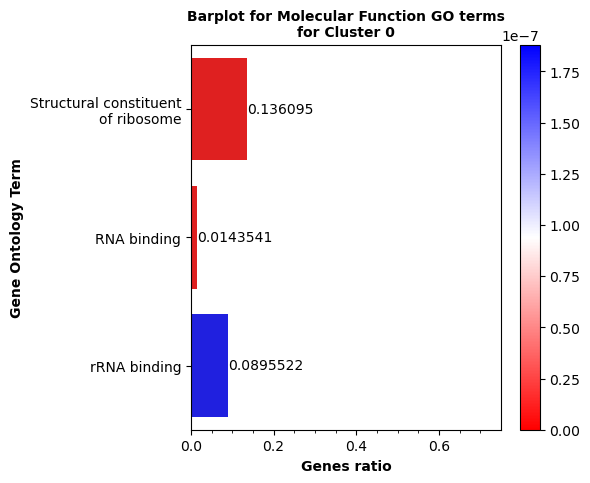

In [25]:
norm = mpl.colors.Normalize(vmin = enrichment_df_sorted_sig_function_top10['fdr'].min(),
                            vmax = enrichment_df_sorted_sig_function_top10['fdr'].max())

mapper = cm.ScalarMappable(norm = norm, cmap = cm.bwr_r)

fig, ax = plt.subplots(figsize = (5, 5))

ax = sns.barplot(data = enrichment_df_sorted_sig_function_top10,
                 x = enrichment_df_sorted_sig_function_top10['genes_ratio'],
                 y = enrichment_df_sorted_sig_function_top10['description'],
                 palette = mapper.to_rgba(enrichment_df_sorted_sig_function_top10['fdr']),
                 dodge=False)

# Add the values to the bars
ax.bar_label(ax.containers[0])

ax.figure.colorbar(mapper, ax=ax)

ax.set_yticklabels([textwrap.fill(go_term, 22) for go_term in enrichment_df_sorted_sig_function_top10['description']])

# Add Plot Title
ax.set_title('Barplot for Molecular Function GO terms\nfor Cluster 0',
             loc ='center', fontweight ='bold', fontsize = 10)

# Adjust the scale of the x-axis.
ax.set_xlim(0.0, 0.75)

# Add minor ticks.
ax.xaxis.set_minor_locator(AutoMinorLocator())

# Add the x-axis label 
plt.xlabel('Genes ratio', fontweight ='bold', fontsize = 10) 

# Add the x-axis label 
plt.ylabel('Gene Ontology Term', fontweight ='bold', fontsize = 10)

plt.show()

# <span style="color:blue">Generate the barplot with the significant results from our Gene Ontology Enrichment Analysis for Biological Process.</span>

## <span style="color:blue">Display the </span><span style="color:red">top 10 significant gene ontology results</span><span style="color:blue"> for the Biological Process.</span>

In [26]:
# Display the top 10 significant gene ontology results for the Biological Process.
enrichment_df_sorted_sig_process_top10

,category,term,number_of_genes,number_of_genes_in_background,ncbiTaxonId,inputGenes,preferredNames,p_value,fdr,description,genes_ratio
12,Process,GO:0002181,23,123,9606,"RPL18A,RPL19,RPS12,RPS27A,RPS3,RPL29,RPL13,RPS...","RPL18A,RPL19,RPS12,RPS27A,RPS3,RPL29,RPL13,RPS...",3.840000e-49,6.020000e-45,Cytoplasmic translation,0.186992
13,Process,GO:0006412,24,389,9606,"RPL18A,RPL19,RPS12,RPS27A,RPS3,RPL29,RPL13,RPS...","RPL18A,RPL19,RPS12,RPS27A,RPS3,RPL29,RPL13,RPS...",2.590000e-41,2.030000e-37,Translation,0.061697


## <span style="color:blue">Barplot for the Gene Ontology results for Biological Process with a color map legend from the minimum corrected p-value to the maximum corrected p-value.</span>

In [27]:
# Display the minimum and maximum FDR value for Process.
print('Category = Process')
print('\n\tMinimum FDR =', enrichment_df_sorted_sig_process_top10['fdr'].min())

print('\n\tMaximum FDR =', enrichment_df_sorted_sig_process_top10['fdr'].max())

Category = Process

	Minimum FDR = 6.02e-45

	Maximum FDR = 2.0300000000000003e-37


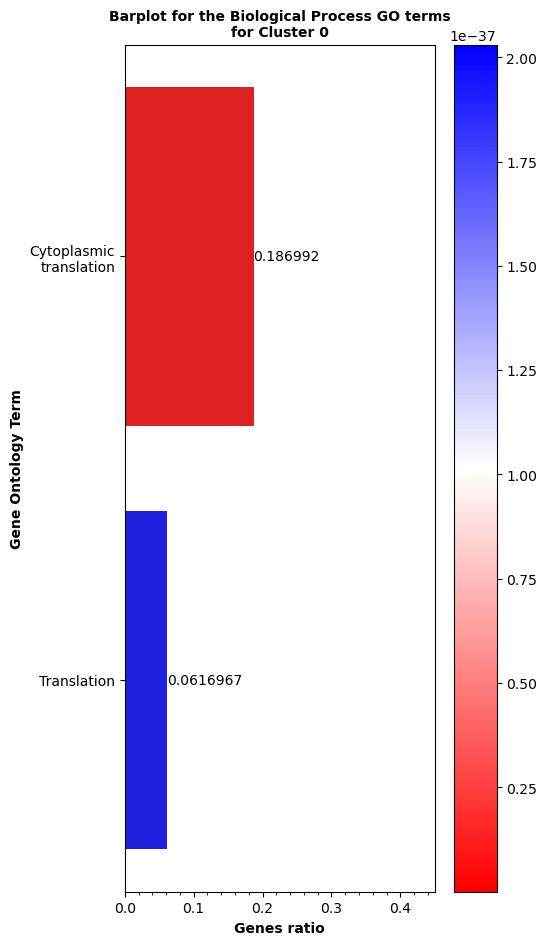

In [28]:
norm = mpl.colors.Normalize(vmin = enrichment_df_sorted_sig_process_top10['fdr'].min(),
                            vmax = enrichment_df_sorted_sig_process_top10['fdr'].max())

mapper = cm.ScalarMappable(norm = norm, cmap = cm.bwr_r)

fig, ax = plt.subplots(figsize = (5, 11))

ax = sns.barplot(data = enrichment_df_sorted_sig_process_top10,
                 x = enrichment_df_sorted_sig_process_top10['genes_ratio'],
                 y = enrichment_df_sorted_sig_process_top10['description'],
                 palette = mapper.to_rgba(enrichment_df_sorted_sig_process_top10['fdr']))

# Add the values to the bars
ax.bar_label(ax.containers[0])

ax.figure.colorbar(mapper, ax=ax)

ax.set_yticklabels([textwrap.fill(go_term, 22) for go_term in enrichment_df_sorted_sig_process_top10['description']])

# Add Plot Title
ax.set_title('Barplot for the Biological Process GO terms\nfor Cluster 0',
             loc ='center', fontweight ='bold', fontsize = 10)

# Adjust the scale of the x-axis.
ax.set_xlim(0.0, 0.45)

# Add minor ticks.
ax.xaxis.set_minor_locator(AutoMinorLocator())

# Add the x-axis label 
plt.xlabel('Genes ratio', fontweight ='bold', fontsize = 10) 

# Add the x-axis label 
plt.ylabel('Gene Ontology Term', fontweight ='bold', fontsize = 10) 

plt.show()

# <span style="color:blue">Generate the barplot with the significant results from our Gene Ontology Enrichment Analysis for Cellular Component.</span>

## <span style="color:blue">Display the </span><span style="color:red">top 10 significant gene ontology results</span><span style="color:blue"> for the Cellular Component.</span>

In [29]:
# Display the top 10 significant gene ontology results for the Biological Process.
enrichment_df_sorted_sig_component_top10

,category,term,number_of_genes,number_of_genes_in_background,ncbiTaxonId,inputGenes,preferredNames,p_value,fdr,description,genes_ratio
18,Component,GO:0022626,23,101,9606,"RPL18A,RPL19,RPS12,RPS27A,RPS3,RPL29,RPL13,RPS...","RPL18A,RPL19,RPS12,RPS27A,RPS3,RPL29,RPL13,RPS...",6.350000e-51,1.300000e-47,Cytosolic ribosome,0.227723
19,Component,GO:0044391,23,187,9606,"RPL18A,RPL19,RPS12,RPS27A,RPS3,RPL29,RPL13,RPS...","RPL18A,RPL19,RPS12,RPS27A,RPS3,RPL29,RPL13,RPS...",2.920000e-45,2.990000e-42,Ribosomal subunit,0.122995
20,Component,GO:0022627,14,44,9606,"RPS12,RPS27A,RPS3,RPS15A,RPS2,RPS3A,RPS4X,RPS6...","RPS12,RPS27A,RPS3,RPS15A,RPS2,RPS3A,RPS4X,RPS6...",1.270000e-30,5.180000e-28,Cytosolic small ribosomal subunit,0.318182
21,Component,GO:0022625,9,56,9606,"RPL18A,RPL19,RPL29,RPL13,RPL3,RPL34,RPL10,RPL3...","RPL18A,RPL19,RPL29,RPL13,RPL3,RPL34,RPL10,RPL3...",3.240000e-17,9.470000e-15,Cytosolic large ribosomal subunit,0.160714
22,Component,GO:0043232,24,5191,9606,"RPL18A,RPL19,RPS12,RPS27A,RPS3,RPL29,RPL13,RPS...","RPL18A,RPL19,RPS12,RPS27A,RPS3,RPL29,RPL13,RPS...",1.310000e-14,3.040000e-12,Intracellular non-membrane-bounded organelle,0.004623
23,Component,GO:0005829,24,5438,9606,"RPL18A,RPL19,RPS12,RPS27A,RPS3,RPL29,RPL13,RPS...","RPL18A,RPL19,RPS12,RPS27A,RPS3,RPL29,RPL13,RPS...",3.990000e-14,7.430000e-12,Cytosol,0.004413
24,Component,GO:0032991,24,5506,9606,"RPL18A,RPL19,RPS12,RPS27A,RPS3,RPL29,RPL13,RPS...","RPL18A,RPL19,RPS12,RPS27A,RPS3,RPL29,RPL13,RPS...",5.380000e-14,9.170000e-12,Protein-containing complex,0.004359
25,Component,GO:0005925,11,416,9606,"RPL19,RPS3,RPS2,RPL3,RPS3A,RPS4X,RPS8,RPS18,RP...","RPL19,RPS3,RPS2,RPL3,RPS3A,RPS4X,RPS8,RPS18,RP...",8.350000e-13,1.320000e-10,Focal adhesion,0.026442
26,Component,GO:0005844,7,65,9606,"RPL18A,RPL19,RPS3,RPS4X,RPS6,RPL32,RPL11","RPL18A,RPL19,RPS3,RPS4X,RPS6,RPL32,RPL11",2.110000e-12,2.880000e-10,Polysome,0.107692
27,Component,GO:0005730,12,996,9606,"RPL19,RPS27A,RPS3,RPL13,EEF1A1,RPL3,RPS3A,RPS6...","RPL19,RPS27A,RPS3,RPL13,EEF1A1,RPL3,RPS3A,RPS6...",4.550000e-10,5.820000e-08,Nucleolus,0.012048


## <span style="color:blue">Barplot for the Gene Ontology results for Cellular Component with a color map legend from the minimum corrected p-value to the maximum corrected p-value.</span>

In [30]:
# Display the minimum and maximum FDR value for Component.
print('Category = Component')
print('\n\tMinimum FDR =', enrichment_df_sorted_sig_component_top10['fdr'].min())

print('\n\tMaximum FDR =', enrichment_df_sorted_sig_component_top10['fdr'].max())

Category = Component

	Minimum FDR = 1.2999999999999998e-47

	Maximum FDR = 5.82e-08


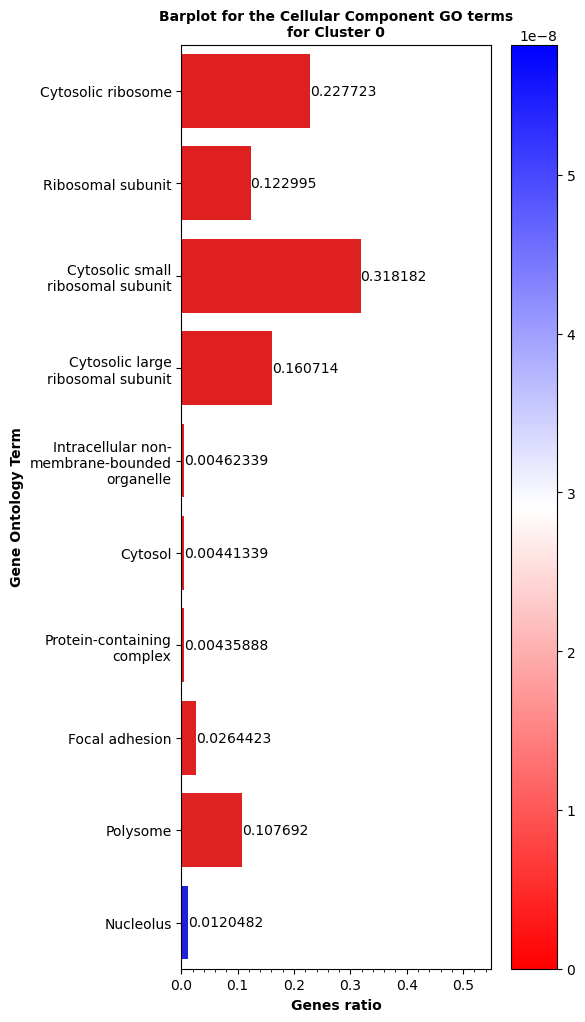

In [31]:
norm = mpl.colors.Normalize(vmin = enrichment_df_sorted_sig_component_top10['fdr'].min(),
                            vmax = enrichment_df_sorted_sig_component_top10['fdr'].max())

mapper = cm.ScalarMappable(norm = norm, cmap = cm.bwr_r)

fig, ax = plt.subplots(figsize = (5, 12))

ax = sns.barplot(data = enrichment_df_sorted_sig_component_top10,
                 x = enrichment_df_sorted_sig_component_top10['genes_ratio'],
                 y = enrichment_df_sorted_sig_component_top10['description'],
                 palette = mapper.to_rgba(enrichment_df_sorted_sig_component_top10['fdr']))

# Add the values to the bars
ax.bar_label(ax.containers[0])

ax.figure.colorbar(mapper, ax=ax)

ax.set_yticklabels([textwrap.fill(go_term, 22) for go_term in enrichment_df_sorted_sig_component_top10['description']])

# Add Plot Title
ax.set_title('Barplot for the Cellular Component GO terms\nfor Cluster 0',
             loc ='center', fontweight ='bold', fontsize = 10)

# Adjust the scale of the x-axis.
ax.set_xlim(0.0, 0.55)

# Add minor ticks.
ax.xaxis.set_minor_locator(AutoMinorLocator())

# Add the x-axis label 
plt.xlabel('Genes ratio', fontweight ='bold', fontsize = 10) 

# Add the x-axis label 
plt.ylabel('Gene Ontology Term', fontweight ='bold', fontsize = 10) 

plt.show()

# <span style="color:blue">Get the </span><span style="color:red">functional annotation </span><span style="color:blue">for our dataset.</span>

|<span style="color:blue">Field</span>|<span style="color:blue">Description</span>|
|:---:|:---------:|
|category|term category (COMPARTMENTS, Component, DISEASES, Function, HPO = Human Phenotype Ontology, InterPro, KEGG (Kyoto Encyclopedia of Genes and Genomes), Keyword, NetworkNeighborAL, Pfam (Protein families), PMID = PubMed reference number, Process, RCTM (Reactome), SMART (Simple Modular Architecture Research Tool), TISSUES (Tissue Expression Database) & WikiPathways)|
|term|enriched term (GO term, domain or pathway)|
|number_of_genes|number of genes in your input list with the term assigned|
|ratio_in_set|ratio of the proteins in your input list with the term assigned|
|ncbiTaxonId|NCBI taxon identifier|
|inputGenes|gene names from your input|
|preferredNames|common protein names (in the same order as your input Genes)|
|description|description of the enriched term|

In [32]:
#########################
# Functional annotation #
#########################
#
functional_annotation_df = stringdb.get_functional_annotation(string_ids.preferredName)
print('\nFunctional annotation\n')
print(functional_annotation_df)

# Export the enrichment_df_sorted pandas data frame into a file.
functional_annotation_df.to_csv('functional_annotations.csv')


Functional annotation

               category          term  number_of_genes  ratio_in_set  \
0          COMPARTMENTS  GOCC:0000323                1         0.042   
1          COMPARTMENTS  GOCC:0001726                2         0.083   
2          COMPARTMENTS  GOCC:0005576                2         0.083   
3          COMPARTMENTS  GOCC:0005615                1         0.042   
4          COMPARTMENTS  GOCC:0005622               24         1.000   
...                 ...           ...              ...           ...   
2302  NetworkNeighborAL        CL:900                1         0.042   
2303  NetworkNeighborAL        CL:902                1         0.042   
2304  NetworkNeighborAL        CL:905                1         0.042   
2305  NetworkNeighborAL        CL:907                1         0.042   
2306  NetworkNeighborAL        CL:908                1         0.042   

      ncbiTaxonId                                         inputGenes  \
0            9606                      

# <span style="color:blue">Get </span><span style="color:red">functional enrichment </span><span style="color:blue">with </span><span style="color:red">category = "Process"</span><span style="color:blue"> and a </span><span style="color:red">FDR < 0.00001</span><span style="color:blue">.</span>

|<span style="color:blue">Field</span>|<span style="color:blue">Description</span>|
|:---:|:---------:|
|category|term category (COMPARTMENTS, Component, DISEASES, Function, HPO = Human Phenotype Ontology, InterPro, KEGG (Kyoto Encyclopedia of Genes and Genomes), Keyword, NetworkNeighborAL, Pfam (Protein families), PMID = PubMed reference number, Process, RCTM (Reactome), SMART (Simple Modular Architecture Research Tool), TISSUES (Tissue Expression Database) & WikiPathways)|
|term|enriched term (GO term, domain or pathway)|
|number_of_genes|number of genes in your input list with the term assigned|
|number_of_genes_in_background|total number of genes in the background proteome with the term assigned|
|ncbiTaxonId|NCBI taxon identifier|
|inputGenes|gene names from your input|
|preferredNames|common protein names (in the same order as your input Genes)|
|p_value|raw p-value|
|fdr|False Discovery Rate|
|description|description of the enriched term|

In [33]:
#    STRING maps several databases onto its proteins, this includes: Gene Ontology,
# KEGG pathways, UniProt Keywords, PubMed publications, Pfam domains, InterPro
# domains, and SMART domains.The STRING enrichment API method allows you to retrieve
# functional enrichment for any set of input proteins. It will tell you which of your
# input proteins have an enriched term and the term's description.
# The API provides the raw p-values, as well as, False Discovery Rate and Bonferroni
# corrected p-values.
#
# Reference
#    Franceschini A, Szklarczyk D, Frankild S, Kuhn M, Simonovic M, Roth A, Lin J,
# Minguez P, Bork P, von Mering C, et al. 2013. STRING v9.1: protein-protein interaction
# networks, with increased coverage and integration. Nucleic Acids Res. 
# 41(Database issue):D808-15. doi:10.1093/nar/gks1094. http://dx.doi.org/10.1093/nar/gks1094.

string_api_url = "https://version-12-0.string-db.org/api"
output_format = "json"
method = "enrichment"

# Construct the request
request_url = "/".join([string_api_url, output_format, method])

# Set parameters
params = {

    "identifiers" : "%0d".join(string_ids.preferredName), # your protein
    "species" : 9606, # species NCBI identifier 9606 is Homo sapiens  
    "caller_identity" : "www.awesome_app.org" # your app name

}

# Call STRING
response = requests.post(request_url, data=params)

# Read and parse the results
data = json.loads(response.text)

col1_name = 'Term'
col2_name = 'Preferred Names'
col3_name = 'FDR'
col4_name = 'Description'

print(col1_name.center(12),'\t', col2_name.center(30), '\t\t\t\t', col3_name.center(10), '\t', col4_name.center(30))
for row in data:
    # GO term
    term = row["term"]
    # Preferred gene names
    preferred_names = ",".join(row["preferredNames"])
    # False Discovery Rate
    fdr = float(row["fdr"])
    # Description
    description = row["description"]
    # Category
    category = row["category"]
    # If category is Process & the False Discovery Rate < 0.01 display the information.
    if ((category == "Process") and (fdr < 0.00001)):
        # Print significant GO Process annotations
        print("\t".join([term.center(12), preferred_names.center(30), str(fdr).center(10), description.center(30)]), '\n')

    Term     	        Preferred Names         				    FDR     	          Description          
 GO:0002181 	RPL18A,RPL19,RPS12,RPS27A,RPS3,RPL29,RPL13,RPS15A,RPS2,RPL3,RPS3A,RPS4X,RPS6,RPL34,RPS8,RPS18,RPL10,RPS24,RPL32,RPS13,RPS19,RPS10,RPL11	 6.02e-45 	   Cytoplasmic translation     

 GO:0006412 	RPL18A,RPL19,RPS12,RPS27A,RPS3,RPL29,RPL13,RPS15A,EEF1A1,RPS2,RPL3,RPS3A,RPS4X,RPS6,RPL34,RPS8,RPS18,RPL10,RPS24,RPL32,RPS13,RPS19,RPS10,RPL11	 2.03e-37 	         Translation           



# <span style="color:blue">Now you can repeat the process to</span>
* ## <span style="color:blue">1) generate the </span><span style="color:red">functional protein-protein interaction networks</span><span style="color:blue"> for the marker genes for each cluster,</span>
* ## <span style="color:blue">2) generate the </span><span style="color:red">physical protein-protein interaction networks</span><span style="color:blue"> for the marker genes for each cluster, and</span>
* ## <span style="color:blue">3) perform </span><span style="color:red">functional enrichment analysis</span><span style="color:blue"> for the marker genes for each cluster.</span>